In [1]:
cog_key = 'aaafdfa6aeb249cbbaa52a601eca7a6f'
cog_endpoint = 'https://license-plate-extraction.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://license-plate-extraction.cognitiveservices.azure.com/ using key aaafdfa6aeb249cbbaa52a601eca7a6f


In [1]:
! pip install azure-cognitiveservices-vision-computervision 

  Using cached azure_cognitiveservices_vision_computervision-0.7.0-py2.py3-none-any.whl (35 kB)
  Using cached msrest-0.6.21-py2.py3-none-any.whl (85 kB)
  Using cached azure_common-1.1.26-py2.py3-none-any.whl (12 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached isodate-0.6.0-py2.py3-none-any.whl (45 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


position
depositph
Pour thousand different kinds of wild flowers
How beautiful they are ! Ine of the wonderful
about flowers is that they are beautiful ; over and
above 'their flowen functions , they are lovely into
the bargain , Why are they beautiful ? Because
the Creaton is an Artist ; and, in addition , to making
things which are necessary and useful to life , he ma-
kes them beautiful - and they vire here to see how
Posi
beautiful they are !
you don't know how beautiful flowers can be unless
you look closely at them . Have you ever picked a flower
of the white 'Dead Nettle , which is kor common every-
where and, turning it upside down , seen the pattern
whith the black and jellevr anthers make against
the white of the flowers hood ? Or have you ever taken
the green bud of the wild hophy, jest when the scar-
let is beginning to shor at the side , and opened
it and Unpacked the pofphy?
depositphe
ositphotos
O) depositphotos
Image ID: 309232550
www.depositphotos.com




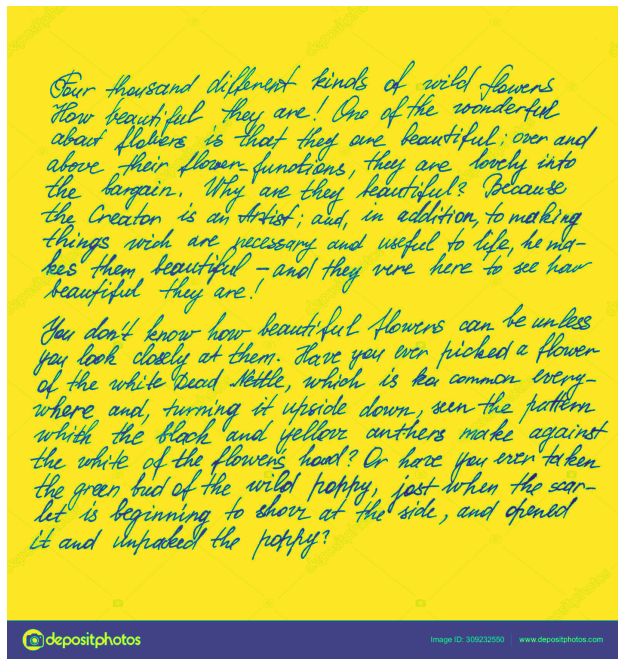

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Read the image file
image_path = os.path.join('handwriting.jpg')
image_stream = open(image_path, "rb")

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Submit a request to read printed text in the image and get the operation ID
read_operation = computervision_client.read_in_stream(image_stream, raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# If the operation was successfuly, process the text line by line
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Open image and display it.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)